In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime

import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
colors = sns.color_palette()
%matplotlib inline

In [3]:
file = r'../data/OnlineRetail.csv'
online = pd.read_csv(file, encoding='Unicode_escape', parse_dates=['InvoiceDate'])
online.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
124260,546972,47566,PARTY BUNTING,16,2011-03-18 12:04:00,10.79,NaN,United Kingdom
8851,537154,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-05 13:05:00,2.95,15808.0,United Kingdom
98401,544678,22892,SET OF SALT AND PEPPER TOADSTOOLS,3,2011-02-22 16:15:00,1.25,13077.0,United Kingdom


In [4]:
df = online['Description'].value_counts()

In [5]:
data = df.head(20)

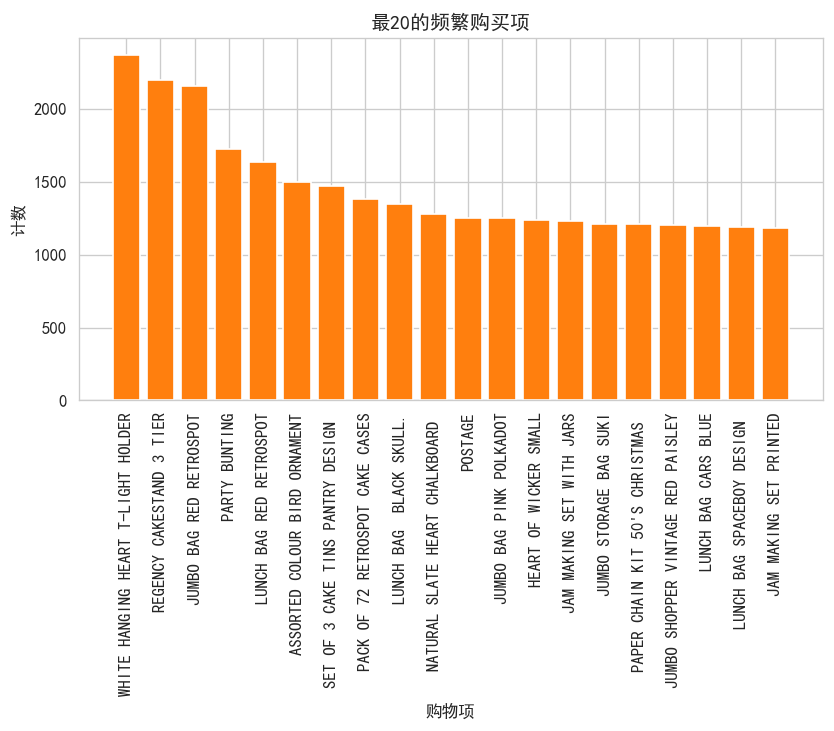

In [6]:
plt.figure(figsize=(8, 4), dpi=120)
plt.bar(data.index, data, color=colors[1])
plt.title('最20的频繁购买项')
plt.ylabel('计数')
plt.xlabel('购物项')
plt.xticks(rotation=90)
plt.show()

In [7]:
online.dropna(axis=0, subset=['Description'], inplace=True)
online.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
198656,554058,23006,TRAVEL CARD WALLET FLOWER MEADOW,1,2011-05-20 16:04:00,0.42,17757.0,United Kingdom
240333,558098,22970,LONDON BUS COFFEE MUG,6,2011-06-26 13:31:00,2.55,18044.0,United Kingdom
379570,569699,22616,PACK OF 12 LONDON TISSUES,24,2011-10-05 15:52:00,0.39,12723.0,France
76131,542620,22045,SPACEBOY GIFT WRAP,25,2011-01-31 08:56:00,0.42,13089.0,United Kingdom
66496,541798,21033,JUMBO BAG CHARLIE AND LOLA TOYS,2,2011-01-21 14:17:00,2.95,15311.0,United Kingdom


In [24]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
des                    object
dtype: object

In [8]:
online = online[~online['InvoiceNo'].str.contains('C')]
online.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
526373,580665,22697,GREEN REGENCY TEACUP AND SAUCER,96,2011-12-05 14:06:00,2.55,16684.0,United Kingdom
403132,571552,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-10-18 08:42:00,2.95,16848.0,United Kingdom
327261,565648,23066,SMALL DECO JEWELLERY STAND,2,2011-09-05 16:22:00,8.25,18196.0,United Kingdom
112813,545901,22197,SMALL POPCORN HOLDER,6,2011-03-07 17:52:00,0.85,15834.0,United Kingdom
390392,570516,22818,CARD CHRISTMAS VILLAGE,12,2011-10-11 10:39:00,0.42,14121.0,United Kingdom


In [9]:
basket = online.groupby(by=['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def encode_units(x):
    if x<= 0:
        return 0
    if x>= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)  # 有一项是邮费,不应该放入我们的关联规则

In [11]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

MemoryError: Unable to allocate 11.6 GiB for an array with shape (37675, 2, 20610) and data type int64